<h2> About DataSet: </h2>

- <span style="color:lightblue">**Age**</span>: Age of the patient
- <span style="color:lightgreen">**Sex**</span>: Sex of the patient
- <span style="color:coral">**exang**</span>: Exercise induced angina (<span style="color:tomato">1 = Yes</span>, <span style="color:tomato">0 = No</span>)
- <span style="color:lightblue">**ca**</span>: Number of major vessels (0-3)
- <span style="color:lightgreen">**cp**</span>: Chest pain type  
  (<span style="color:tomato">1 = Typical angina</span>, <span style="color:tomato">2 = Atypical angina</span>, <span style="color:tomato">3 = Non-anginal pain</span>, <span style="color:tomato">4 = Asymptomatic</span>)
- <span style="color:coral">**trtbps**</span>: Resting blood pressure (mm Hg)
- <span style="color:lightblue">**chol**</span>: Cholesterol (mg/dl, via BMI sensor)
- <span style="color:lightgreen">**fbs**</span>: Fasting blood sugar > 120 mg/dl (<span style="color:tomato">1 = True</span>, <span style="color:tomato">0 = False</span>)
- <span style="color:coral">**rest_ecg**</span>: Resting electrocardiogram  
  (<span style="color:tomato">0 = Normal</span>, <span style="color:tomato">1 = ST-T abnormality</span>, <span style="color:tomato">2 = LV hypertrophy by Estes' criteria</span>)
- <span style="color:lightblue">**thalach**</span>: Maximum heart rate achieved
- <span style="color:lightgreen">**target**</span>: Heart attack risk (0 = Less chance, 1 = More chance)




<h1> Import Required Libraries </h1>

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
# Model training & evaluation libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier 

import warnings 
warnings.filterwarnings('ignore')

<h2> Upload DataFrame </h2>

In [4]:
df = pd.read_csv('heart.csv')
# Renmae output col [target] ==> HA_Risk [heart attack risk]
df.rename(columns={'output':'HA_Risk'},inplace=True)
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,HA_Risk
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h2> EDA </h2>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  HA_Risk   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,HA_Risk
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h4> --> Check Missings and Duplication </h4>

In [7]:
print("Missing in Data :" , df.isna().sum().sum())
print("Duplicated in Data :" , df.duplicated().sum())
df[df.duplicated()]

Missing in Data : 0
Duplicated in Data : 1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,HA_Risk
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


<h4> --> Analyize and Visualize Data </h4>

- Age VS thalachh VS exng

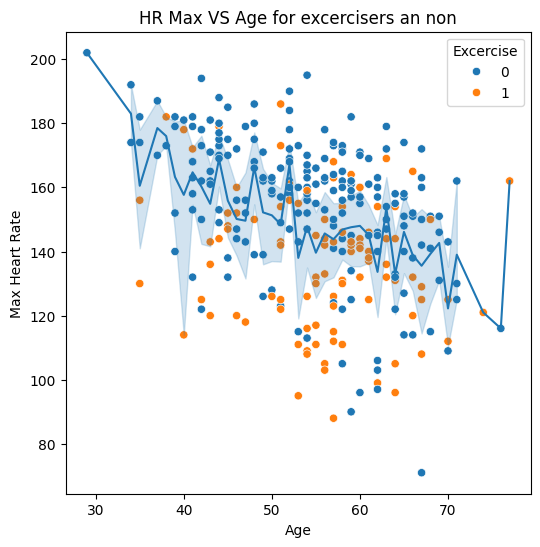

In [8]:
# Maximum heart rate versus age for Excercisers and non EXC
plt.figure(figsize=(6,6))
# scatter plot for Age VS Heart Rate MAx
sns.scatterplot(data=df,x='age', y='thalachh',hue='exng')
#LIne plot for Age Vs heart rate
ax = sns.lineplot(data=df,x='age',y='thalachh')

plt.title('HR Max VS Age for excercisers an non')
plt.ylabel('Max Heart Rate')
plt.xlabel('Age')
# plt.legend(title='Excercise\nYES:1, No:0')
sns.move_legend(ax, title='Excercise', loc='best')  # remove the title

plt.show()
#groubbt --> exang [exercise or not ] scatter,thalach[max hear rate]=y, age =x

- Sex VS CP VS exng

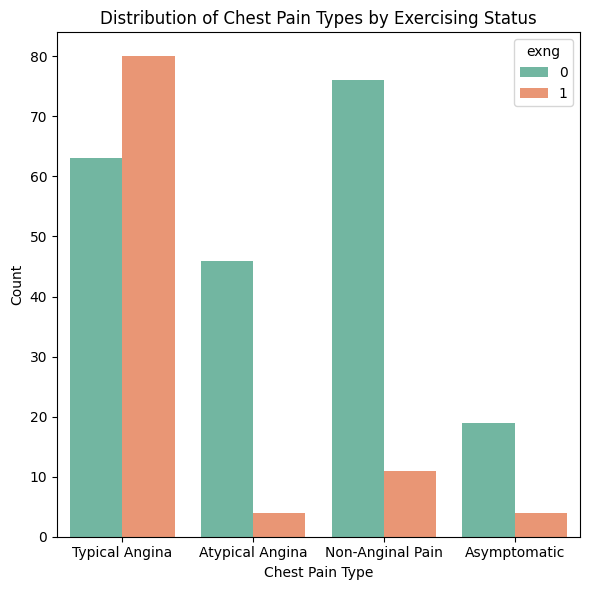

In [9]:
# Chest pain VS Excercise & SEX
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='cp',hue='exng',palette='Set2')

# Setting labels and title
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types by Exercising Status')
# Setting custom labels for the x-axis
cp_labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
plt.xticks(ticks=[0,1,2,3],labels=cp_labels)
plt.tight_layout()
# Display the plot
plt.show()


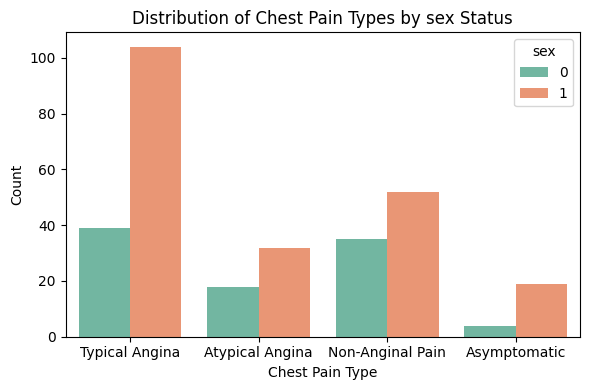

In [10]:
# Chest pain VS  SEX
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='cp',hue='sex',palette='Set2')

# Setting labels and title
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types by sex Status')
# Setting custom labels for the x-axis
cp_labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
plt.xticks(ticks=[0,1,2,3],labels=cp_labels)
plt.tight_layout()
# Display the plot
plt.show()


<h4> Oldpeak vs thalachh VS slp </h4>

- 2D plot 

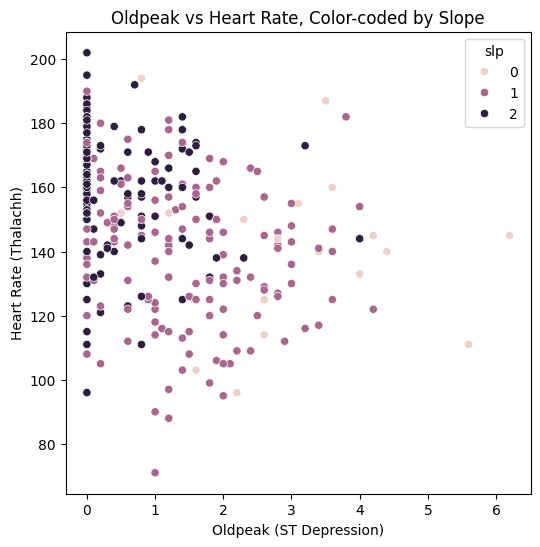

In [11]:
plt.figure(figsize=(6,6))
# scatter plot for SLp,oldpeak VS Heart Rate MAx
sns.scatterplot(data=df,x='oldpeak', y='thalachh',hue='slp')
# Adding labels and title
plt.xlabel('Oldpeak (ST Depression)')
plt.ylabel('Heart Rate (Thalachh)')
plt.title('Oldpeak vs Heart Rate, Color-coded by Slope')

plt.show()

- 3D plot

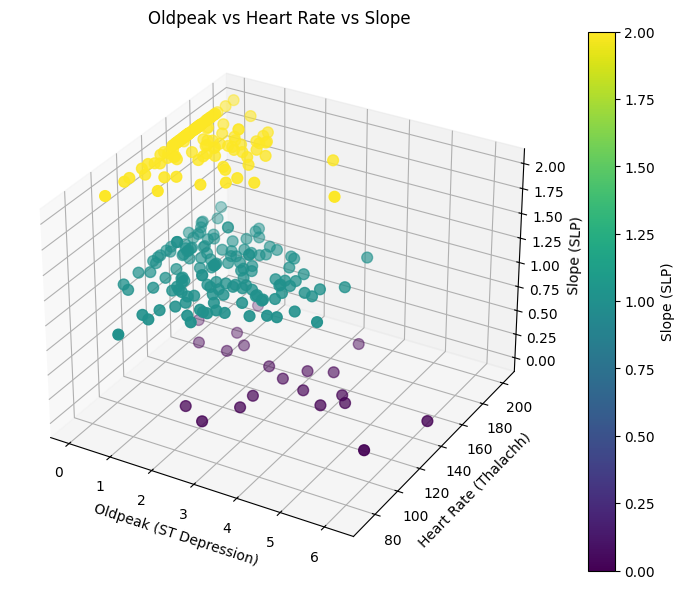

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
sc = ax.scatter(df['oldpeak'], df['thalachh'], df['slp'], c=df['slp'], cmap='viridis', s=60)

# Adding axis labels
ax.set_xlabel('Oldpeak (ST Depression)')
ax.set_ylabel('Heart Rate (Thalachh)')
ax.set_zlabel('Slope (SLP)')

# Adding a color bar to show the slope scale
plt.colorbar(sc, label='Slope (SLP)')

# Title
plt.title('Oldpeak vs Heart Rate vs Slope')

# Display the plot
plt.show()


### --> Heart Attack Vs Features

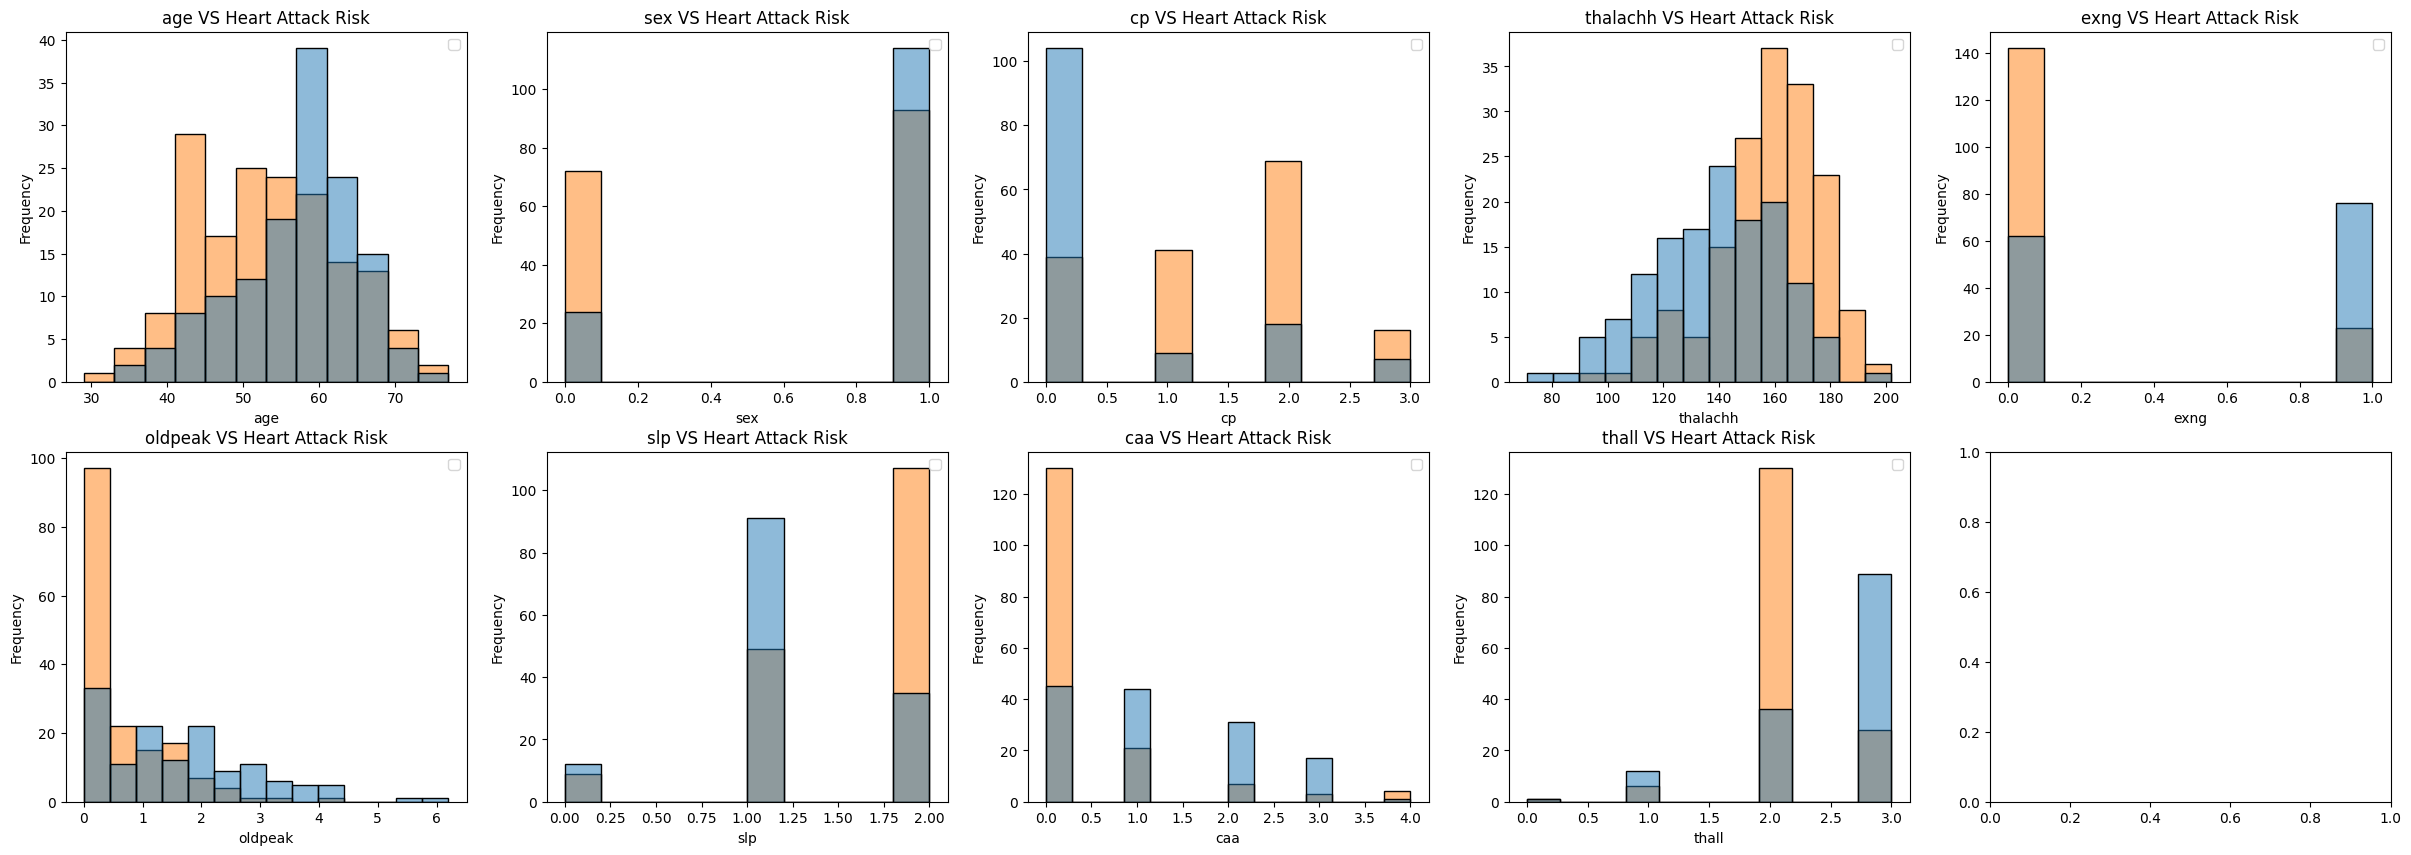

In [13]:
main_feature_col = ['age', 'sex','cp','thalachh','exng','oldpeak','slp','caa','thall']
fig,axes = plt.subplots(2,5,figsize=(30,10))
axes = axes.flatten() 
for i,col in enumerate(main_feature_col):
    sns.histplot(data = df, x=col, hue='HA_Risk', ax=axes[i])
    axes[i].set_title(f'{col} VS Heart Attack Risk')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.show()

<h4> --> check Outliers </h4>

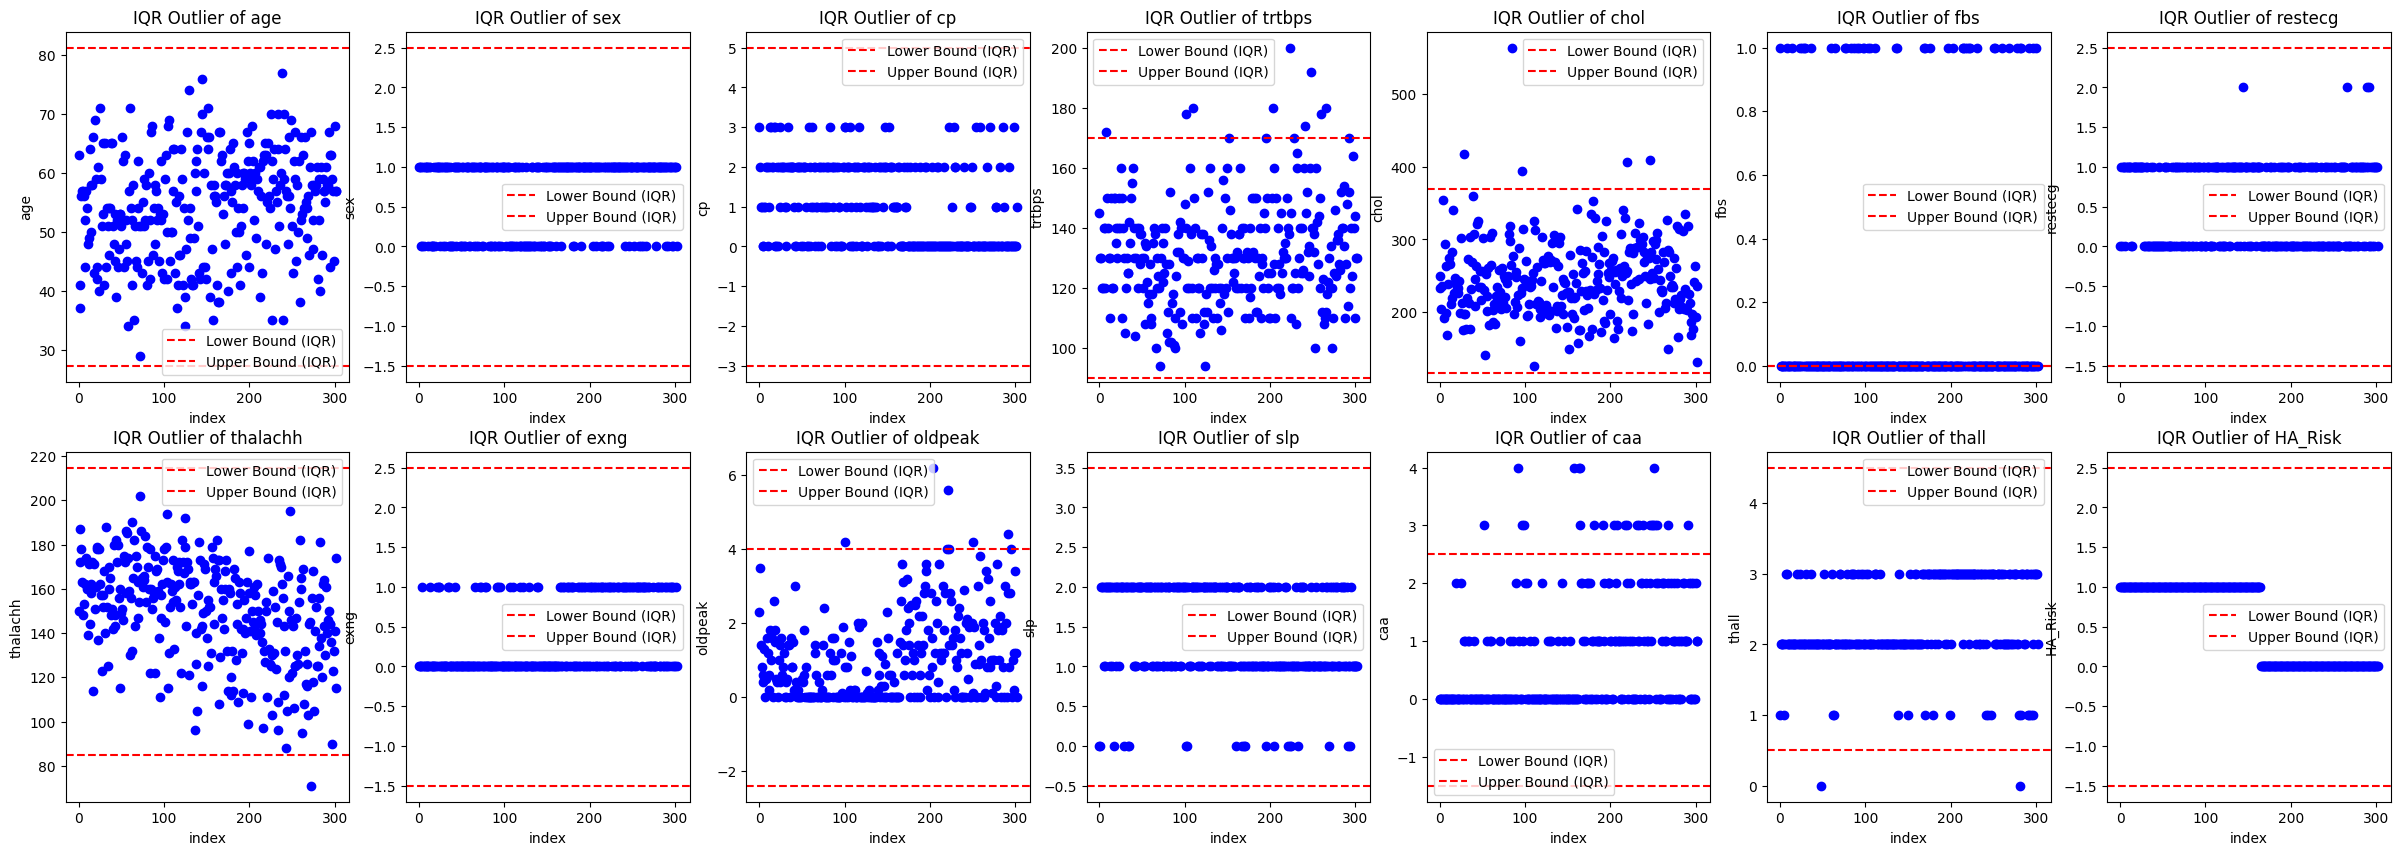

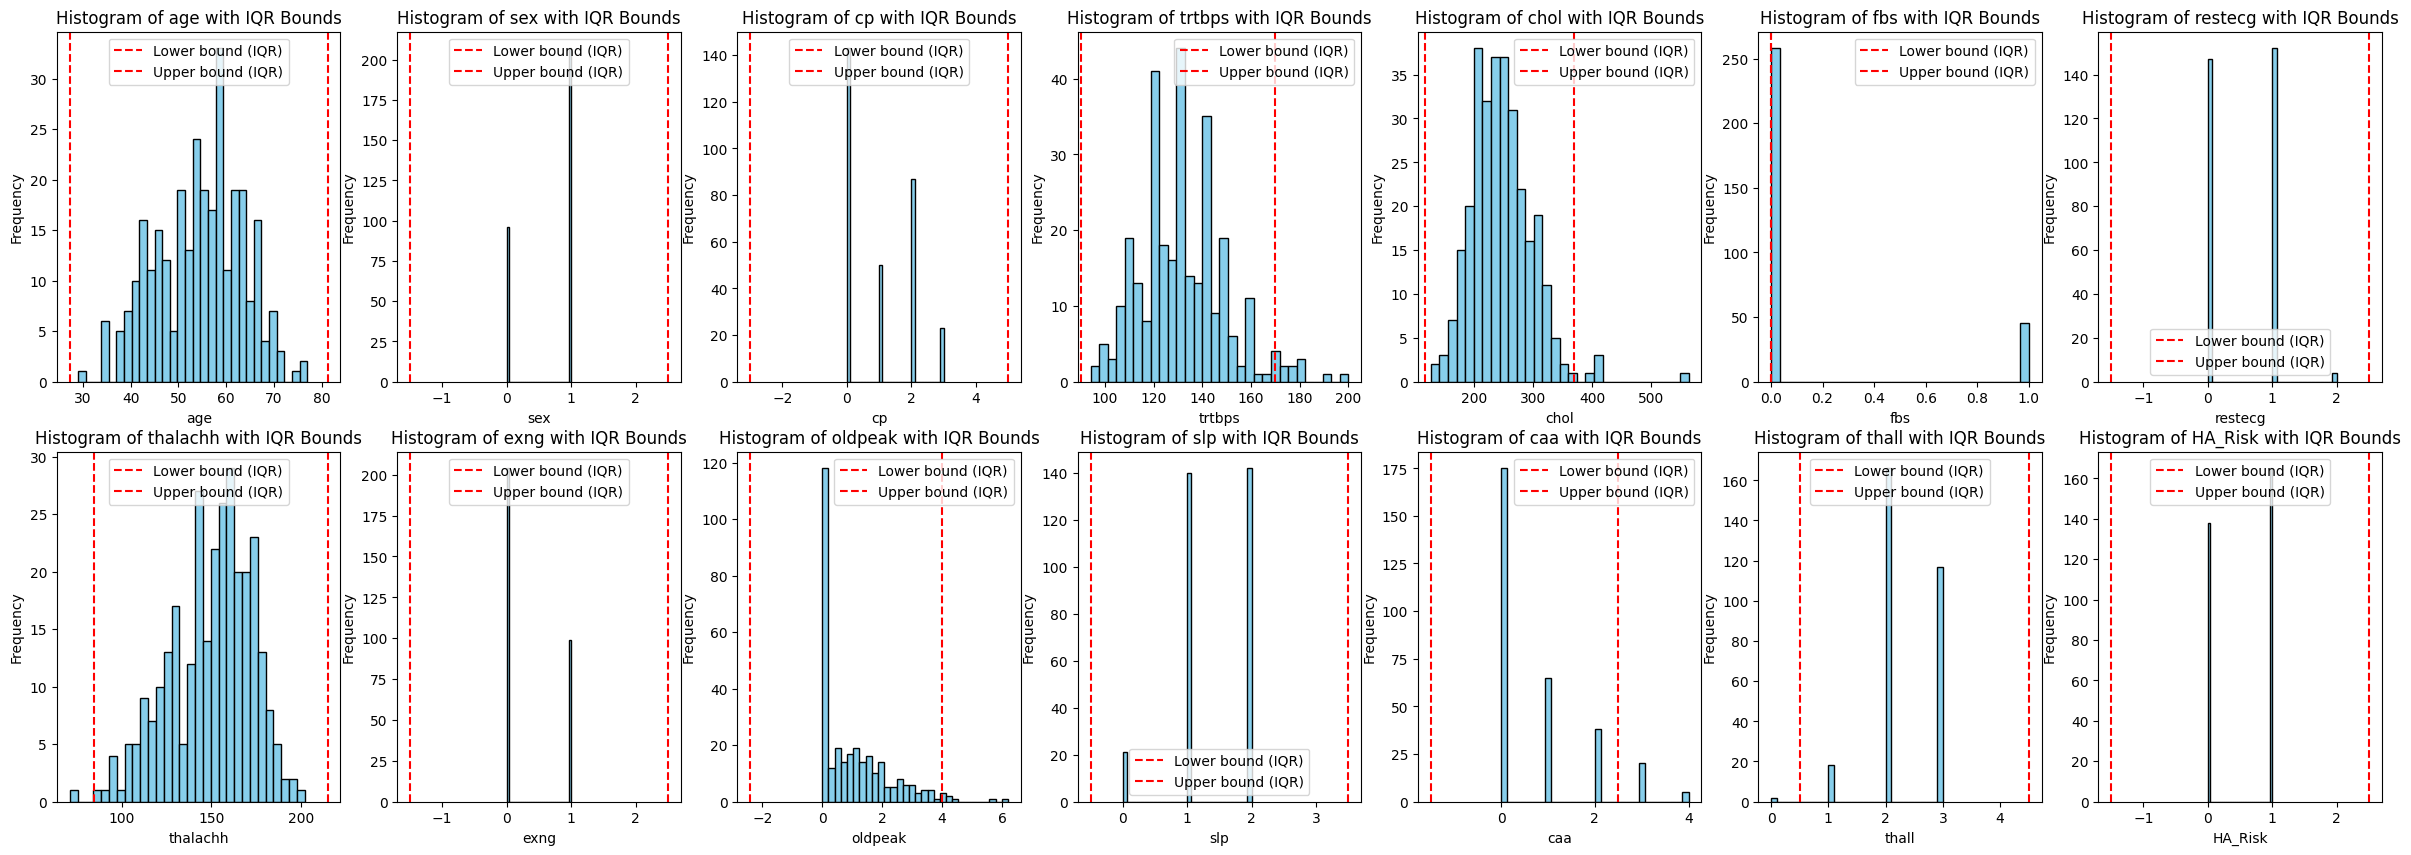

In [14]:
# Get outliers using IQR 
col_names = df.columns.to_list()
fig,axes = plt.subplots(2,7,figsize=(30,10))
axes = axes.flatten()  # Flatten if it's a 2D array

fig,axs = plt.subplots(2,7,figsize=(30,10))
axs = axs.flatten()
# IQR  calculation
for i,col in enumerate(col_names):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5*IQR 
    upper_bound = Q3 + 1.5*IQR

    # Histogram
    axs[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axs[i].axvline(lower_bound, color='red', linestyle='--', label='Lower bound (IQR)')
    axs[i].axvline(upper_bound, color='red', linestyle='--', label='Upper bound (IQR)')
    axs[i].set_title(f'Histogram of {col} with IQR Bounds')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

    # Scatter plot
    axes[i].scatter(df.index,df[col],color='Blue')
    axes[i].axhline(y= lower_bound, color='r', linestyle ='--',label='Lower Bound (IQR)')
    axes[i].axhline(y= upper_bound,color='r', linestyle='--',label = 'Upper Bound (IQR)')
    axes[i].set_xlabel('index')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'IQR Outlier of {col}')
    axes[i].legend()

plt.show()


--> Handeling outliers

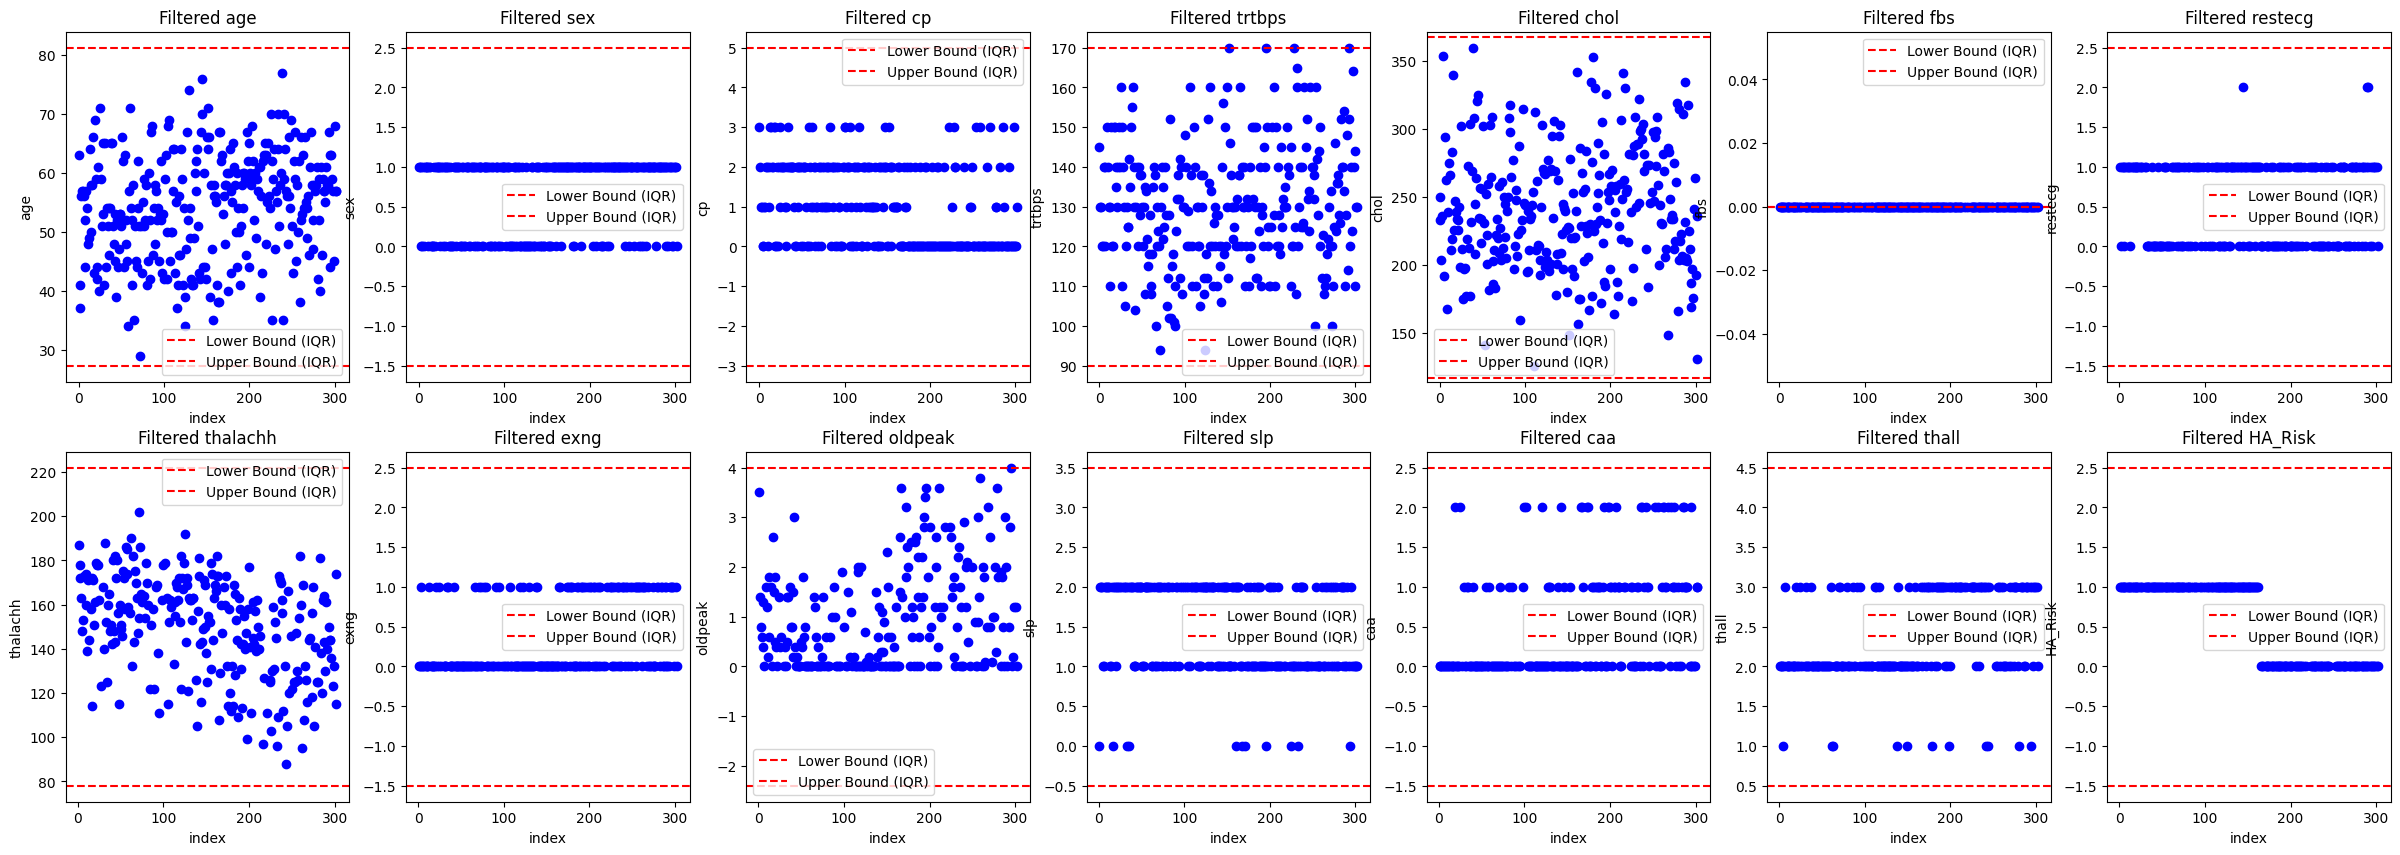

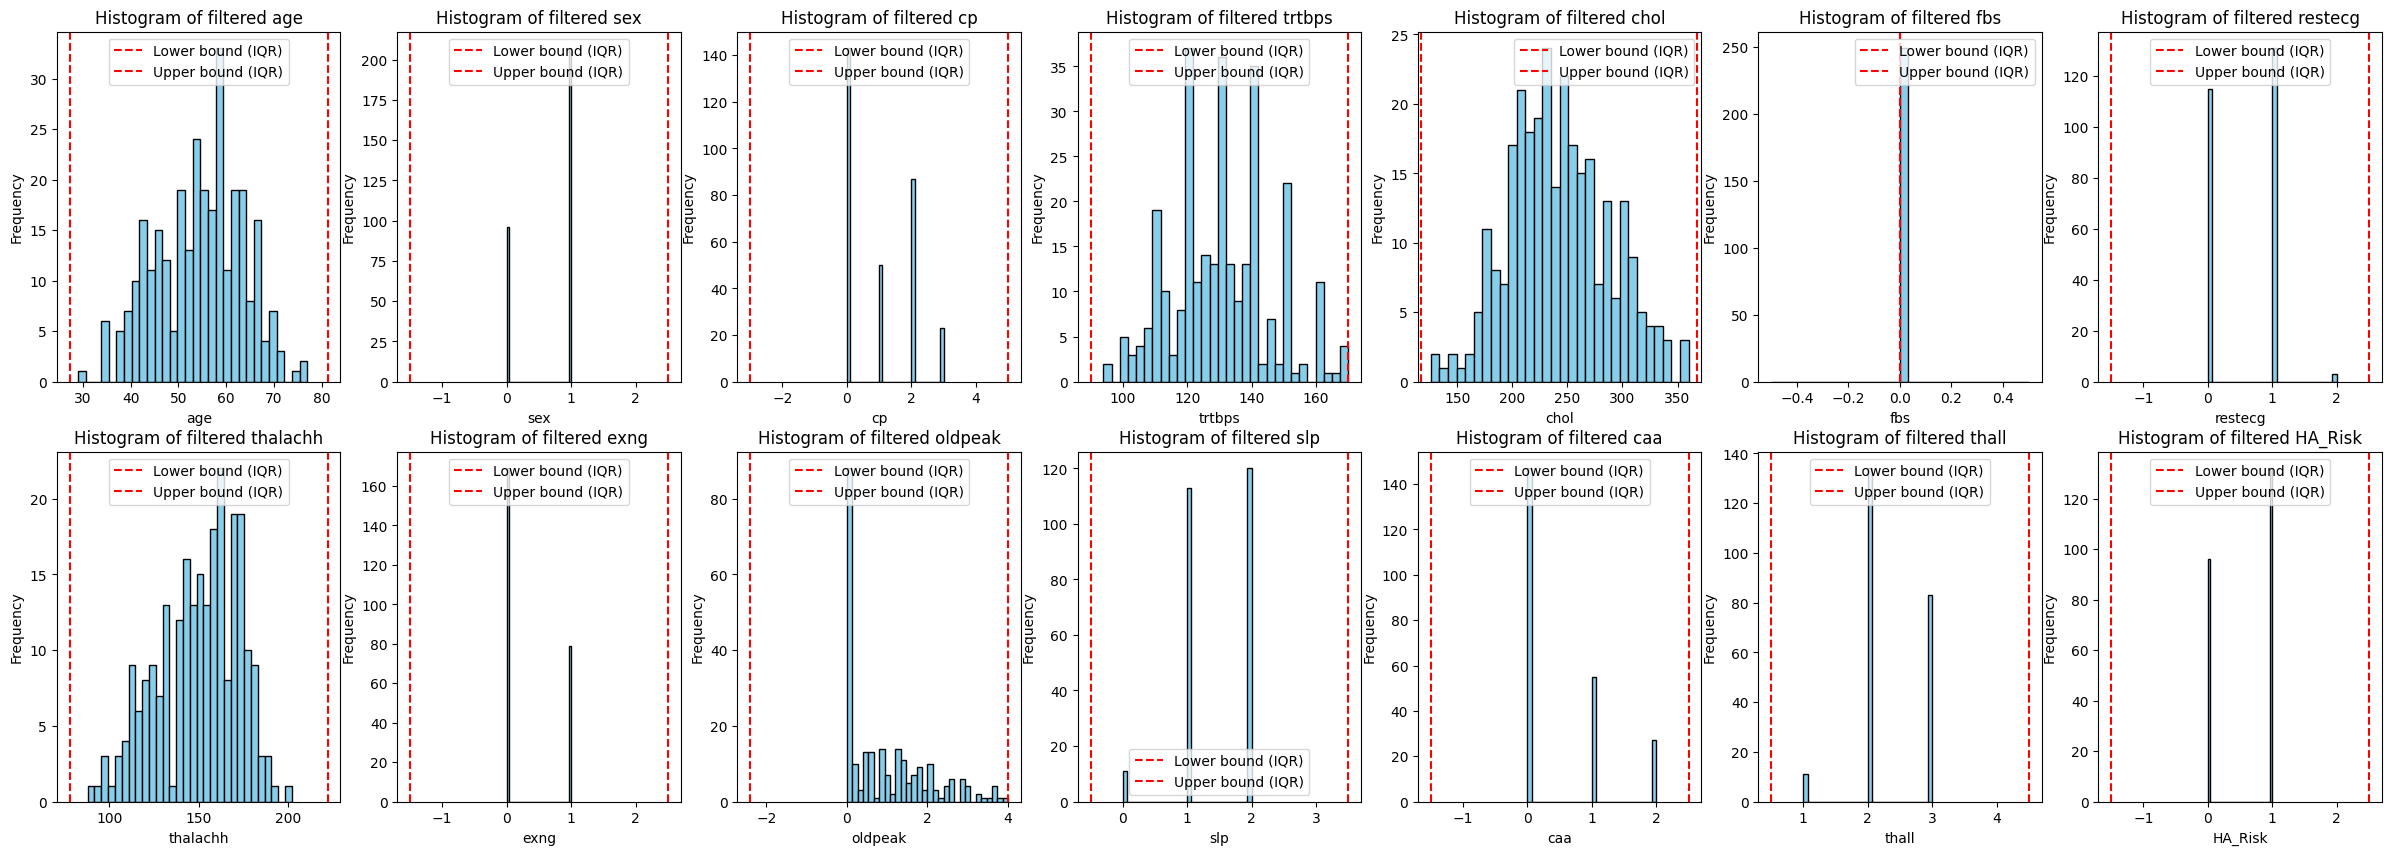

In [15]:
# Get outliers using IQR 
df_outl = df.copy()
col_names = df_outl.columns.to_list()
fig,axes = plt.subplots(2,7,figsize=(30,10))
axes = axes.flatten()  # Flatten if it's a 2D array

fig,axs = plt.subplots(2,7,figsize=(30,10))
axs = axs.flatten()
# IQR  calculation
for i,col in enumerate(col_names):
    Q1 = df_outl[col].quantile(0.25)
    Q3 = df_outl[col].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5*IQR 
    upper_bound = Q3 + 1.5*IQR

    # Removing Outliers using IQR
    df_outl = df_outl[(df_outl[col] >= lower_bound) & (df_outl[col] <= upper_bound)]

    # Histogram
    axs[i].hist(df_outl[col], bins=30, color='skyblue', edgecolor='black')
    axs[i].axvline(lower_bound, color='red', linestyle='--', label='Lower bound (IQR)')
    axs[i].axvline(upper_bound, color='red', linestyle='--', label='Upper bound (IQR)')
    axs[i].set_title(f'Histogram of filtered {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

    # Scatter plot
    axes[i].scatter(df_outl.index,df_outl[col],color='Blue')
    axes[i].axhline(y= lower_bound, color='r', linestyle ='--',label='Lower Bound (IQR)')
    axes[i].axhline(y= upper_bound,color='r', linestyle='--',label = 'Upper Bound (IQR)')
    axes[i].set_xlabel('index')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Filtered {col}')
    axes[i].legend()

plt.show()


<h4> --> Corrlation Matrix </h4>

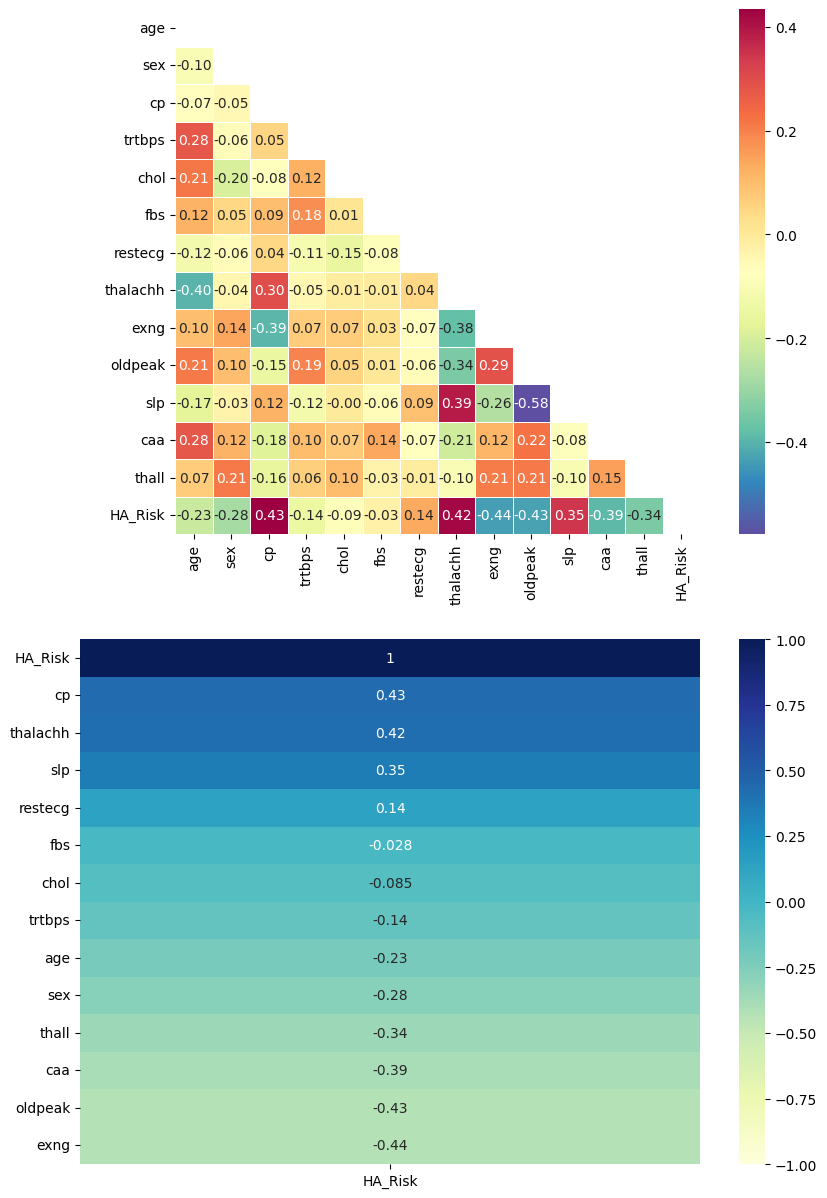

In [16]:
plt.subplots(2,1,figsize=(10,15))
plt.subplot(2,1,1)

corr_mtrx = df.corr()
mask = np.triu(np.ones_like(corr_mtrx,dtype=bool))
sns.heatmap(
            corr_mtrx,
            annot=True,
            square=True,
            fmt='0.2f',
            annot_kws={'size' : 10},
            cmap='Spectral_r',
            cbar=True,
            linewidths=0.5,
            mask = mask
            )

plt.subplot(2,1,2)
corr_mtrx_Tatget = corr_mtrx[['HA_Risk']].sort_values(by='HA_Risk')
sns.heatmap(corr_mtrx_Tatget,
            vmax=1,
            vmin=-1,
            cmap='YlGnBu',
            annot=True).invert_yaxis()


plt.show()

<h4>  check for multicollinearity in a dataset </h4>

<h4> 1. Correlation Matrix </h4>


In [17]:
print('Max correlation value =',corr_mtrx.replace(1,0).abs().max().max())


Max correlation value = 0.5775368167291409


OBS: Max corr value is 0.57 , therefor there is no colinearity features in the dataset.



<h4> 2. VIF (Variance inflation factor) </h4>


In [18]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['HA_Risk'],axis=1)
X = sm.add_constant(X)
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(f"Variance Inflatin Factor (VIF) : {vif}")


Variance Inflatin Factor (VIF) :      Feature         VIF
0      const  207.256646
1        age    1.443474
2        sex    1.161866
3         cp    1.284456
4     trtbps    1.170591
5       chol    1.150174
6        fbs    1.087379
7    restecg    1.060998
8   thalachh    1.613726
9       exng    1.402001
10   oldpeak    1.705857
11       slp    1.642595
12       caa    1.202570
13     thall    1.147279


### Interpretation: 
  - VIF ≤ 5: Generally considered acceptable. 
  - 5 < VIF < 10: Indicates moderate multicollinearity. 
  - VIF ≥ 10: Suggests high multicollinearity, 
    which may require further investigation or remedial action.

### conclusion : 
- No Multi colinearity in data as **VIF< 5**, no need to frop features or using PCA.


<h4> 3. Condition Number </h4>


In [19]:
# X = df.drop(columns=['HA_Risk'],axis=1)
# condition_number = np.linalg.cond(X)
# print(f'Contiona Number : {condition_number}')

--> find every pair of correlated features

In [20]:
# Initialize an empty list to store correlated feature pairs
corr = corr_mtrx
correlated_pairs = []

# Iterate through the correlation matrix
for i in range(len(corr.columns)):
    for j in range(i):
        # Check for correlation greater than 0.3 or less than -0.3
        if abs(corr.iloc[i, j]) > 0.3:
            correlated_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

# Create a DataFrame to display the correlated pairs
correlated_df = pd.DataFrame(correlated_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
print(correlated_df)

   Feature 1 Feature 2  Correlation
0   thalachh       age    -0.398522
1       exng        cp    -0.394280
2       exng  thalachh    -0.378812
3    oldpeak  thalachh    -0.344187
4        slp  thalachh     0.386784
5        slp   oldpeak    -0.577537
6    HA_Risk        cp     0.433798
7    HA_Risk  thalachh     0.421741
8    HA_Risk      exng    -0.436757
9    HA_Risk   oldpeak    -0.430696
10   HA_Risk       slp     0.345877
11   HA_Risk       caa    -0.391724
12   HA_Risk     thall    -0.344029


<h2> Feature Selection </h2>

### Based on the correlation with HA_Risk and the VIF analysis, consider the following features for modelling:
- age
- sex
- cp
- thalachh
- exng
- oldpeak
- slp

<h2> Data Scaling </h2>

In [21]:
# Get Feature df & Target col
df_featue_selected = df[['age', 'sex', 'cp', 'thalachh','exng', 'oldpeak', 'slp']]
X = df_featue_selected
Y = df['HA_Risk']
# split train test  data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
# Scaling the features
scaler = StandardScaler()
#fit and transform the data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


<h2> Model Training </h2>

## 1. Logistic Regression


In [22]:
LR = LogisticRegression()
LR.fit(x_train_scaled,y_train)
y_pred_LR = LR.predict(x_test_scaled)

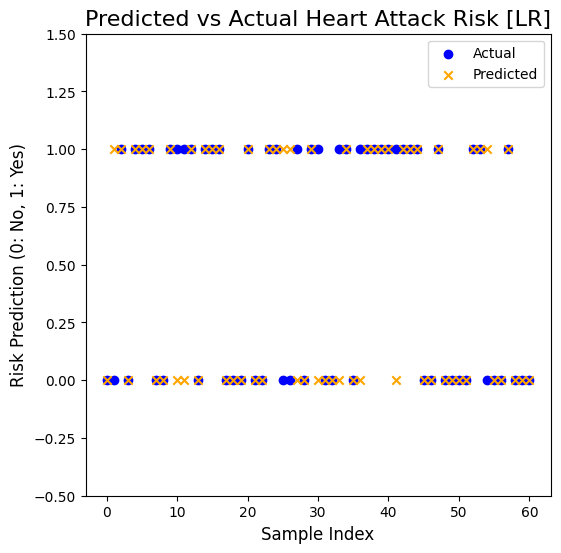

In [40]:
# Create a scatter plot
plt.figure(figsize=(6,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', marker='o')
plt.scatter(range(len(y_pred_LR)), y_pred_LR, color='orange', label='Predicted', marker='x')

# Add labels and title
plt.title('Predicted vs Actual Heart Attack Risk [LR]', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Risk Prediction (0: No, 1: Yes)', fontsize=12)
plt.legend()

# Show the plot
plt.ylim(-0.5, 1.5)  # Adjust y-axis limit for better visibility
plt.show()

## 2. Random Forest


In [24]:
# 2. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_scaled, y_train)  # RF does not require scaling, but we use the scaled data for consistency
y_pred_rf = rf_model.predict(x_test_scaled)


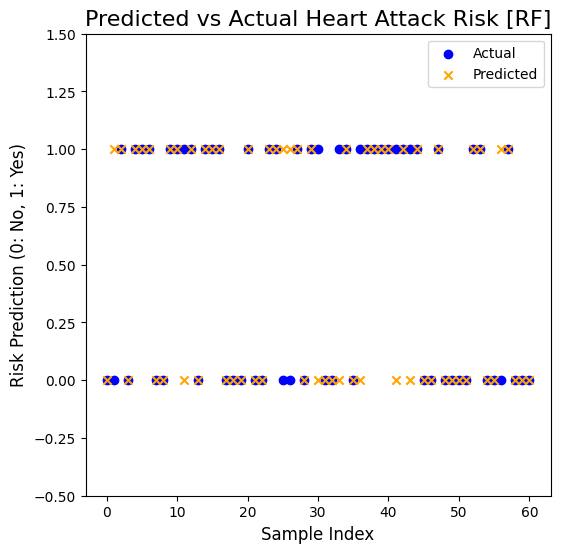

In [39]:
# Create a scatter plot
plt.figure(figsize=(6,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', marker='o')
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='orange', label='Predicted', marker='x')

# Add labels and title
plt.title('Predicted vs Actual Heart Attack Risk [RF]', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Risk Prediction (0: No, 1: Yes)', fontsize=12)
plt.legend()

# Show the plot
plt.ylim(-0.5, 1.5)  # Adjust y-axis limit for better visibility
plt.show()

## 3. Gradient Boosting

In [25]:
# Initialize the GBMs
gb_model = GradientBoostingClassifier(n_estimators=100, 
                                      learning_rate=0.1,
                                        max_depth=3,
                                        random_state=42
                                        )
# train the model
gb_model.fit(x_train_scaled, y_train)
# make prediction on the set
y_pred_gb = gb_model.predict(x_test_scaled)


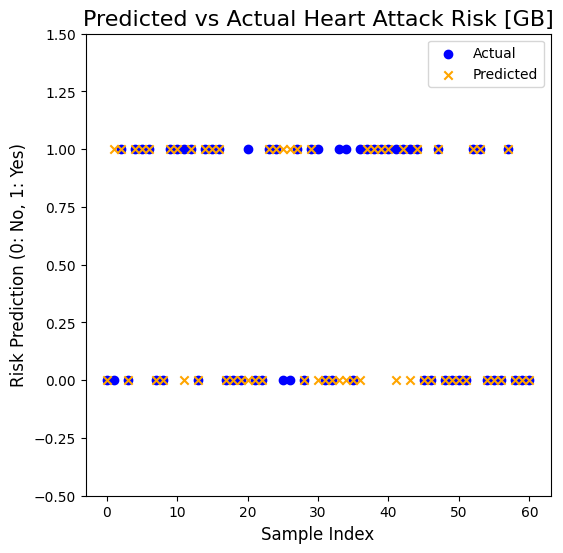

In [38]:
# Create a scatter plot
plt.figure(figsize=(6,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', marker='o')
plt.scatter(range(len(y_pred_gb)), y_pred_gb, color='orange', label='Predicted', marker='x')

# Add labels and title
plt.title('Predicted vs Actual Heart Attack Risk [GB]', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Risk Prediction (0: No, 1: Yes)', fontsize=12)
plt.legend()

# Show the plot
plt.ylim(-0.5, 1.5)  # Adjust y-axis limit for better visibility
plt.show()

## plot prediction of models 

In [26]:
# Evaluate Logistic Regression
lr_acc = accuracy_score(y_test, y_pred_LR)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_LR)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_LR)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_LR)}")


Logistic Regression Results:
Accuracy: 0.819672131147541
Confusion Matrix:
[[25  4]
 [ 7 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [27]:
# Evaluate Random Forest
rf_acc = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


Random Forest Results:
Accuracy: 0.8360655737704918
Confusion Matrix:
[[25  4]
 [ 6 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [28]:
# Evaluate Random Forest
gb_acc = accuracy_score(y_test, y_pred_gb)
print("\nGradien Boasting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_gb)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_gb)}")


Gradien Boasting Results:
Accuracy: 0.819672131147541
Confusion Matrix:
[[26  3]
 [ 8 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



### --> plotting models Results

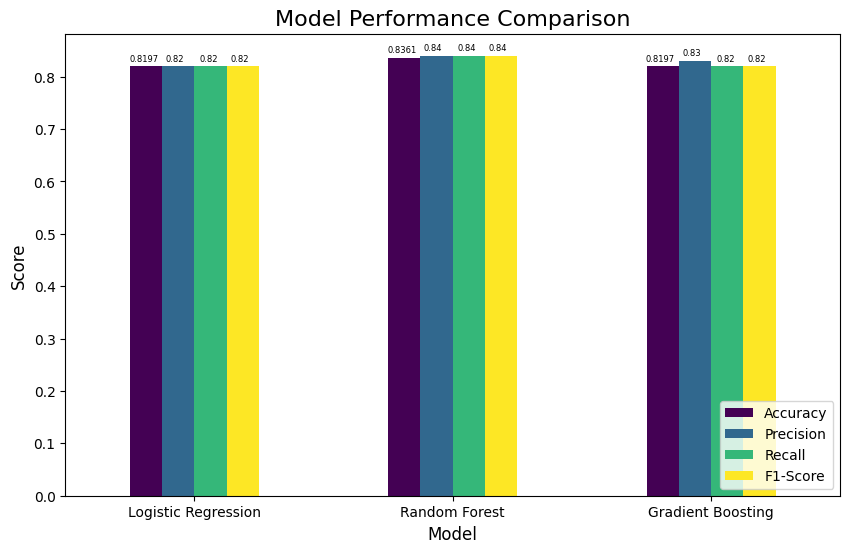

In [29]:
# Define metrics for each model
metrics = {
    'Logistic Regression': {'Accuracy': 0.8197, 'Precision': 0.82, 'Recall': 0.82, 'F1-Score': 0.82},
    'Random Forest': {'Accuracy': 0.8361, 'Precision': 0.84, 'Recall': 0.84, 'F1-Score': 0.84},
    'Gradient Boosting': {'Accuracy': 0.8197, 'Precision': 0.83, 'Recall': 0.82, 'F1-Score': 0.82}
}
# Plot multiple metrics
df_metrics = pd.DataFrame(metrics).T
df_metrics.plot(kind='bar', figsize=(10,6),colormap='viridis')
# Add plot labels and title
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
# plt.ylim(0.7, 0.9)  # Adjust y-axis range if needed
plt.legend(loc='lower right')
plt.xticks(rotation=0)  # Rotate 45 degrees, align right

# Display the accuracy values on top of the bars
for i,metr in enumerate(metrics):
    acc= metrics[metr]['Accuracy']
    plt.text(i - 0.14,acc + 0.01, f'{acc:0.4f}',ha='right',fontsize = 6)
    prec= metrics[metr]['Precision']
    plt.text(i - 0.04,prec + 0.01, f'{prec:0.2f}',ha='right',fontsize = 6)
    recall= metrics[metr]['Recall']
    plt.text(i + 0.02,recall + 0.01, f'{recall:0.2f}',ha='left',fontsize = 6)
    f1= metrics[metr]['F1-Score']
    plt.text(i+ 0.14,f1 + 0.01, f'{f1:0.2f}',ha='left',fontsize = 6)
# Show the plot
plt.show()

<h2> Conclusion:</h2>

* <h4> <b>Random Forest</b> offers the highest accuracy and overall better balance between precision and recall for both classes. It is the strongest model in this set.</h4>
* <h4> <b>Gradient Boosting</b> is more conservative with Class 1 (positive cases), but it has the highest recall for Class 0, meaning it’s more likely to identify healthy individuals correctly, but at the cost of potentially missing some people at risk (lower recall for Class 1).</h4>
* <h4> <b>Logistic Regression</b> performs decently across all metrics but doesn’t outperform the Random Forest in accuracy or recall.</h4>

<h3> <b>Recommendation:</b></h3>
<h4> If the goal is to maximize accuracy and achieve a good balance between precision and recall, <b>Random Forest</b> is the best choice. However, if identifying healthy individuals is more critical (fewer false positives), <b>Gradient Boosting</b> is preferable. </h4>